<a href="https://colab.research.google.com/github/nhwhite212/DealingwithDataSpring2021/blob/master/7-TextMining_NLP/A-NLP_Tokenization_Zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

### Installing NLTK toolkit

Before starting let's install the NLTK library (http://www.nltk.org/), by typing the following commands in vagrant terminal.

* Install Numpy: `sudo -H pip3 install -U numpy`
* Install NLTK: `sudo -H pip3 install -U nltk`
* Install Tkinter: `sudo -H apt-get -y install python3-tk`

Test that the library is installed properly by executing the following command:

Once the NLTK toolkit is installed, we need to install the NLTK data: 

`sudo python -m nltk.downloader -d /usr/share/nltk_data all`

In [2]:
import nltk

In [3]:
!sudo python3 -m nltk.downloader -d /usr/share/nltk_data all

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat t

#### Extra NLTK resources

NLTK also comes with some of the files from Project Gutenberg already included:

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
len(text4)

149797

In [6]:
list(text4)

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Among',
 'the',
 'vicissitudes',
 'incident',
 'to',
 'life',
 'no',
 'event',
 'could',
 'have',
 'filled',
 'me',
 'with',
 'greater',
 'anxieties',
 'than',
 'that',
 'of',
 'which',
 'the',
 'notification',
 'was',
 'transmitted',
 'by',
 'your',
 'order',
 ',',
 'and',
 'received',
 'on',
 'the',
 '14th',
 'day',
 'of',
 'the',
 'present',
 'month',
 '.',
 'On',
 'the',
 'one',
 'hand',
 ',',
 'I',
 'was',
 'summoned',
 'by',
 'my',
 'Country',
 ',',
 'whose',
 'voice',
 'I',
 'can',
 'never',
 'hear',
 'but',
 'with',
 'veneration',
 'and',
 'love',
 ',',
 'from',
 'a',
 'retreat',
 'which',
 'I',
 'had',
 'chosen',
 'with',
 'the',
 'fondest',
 'predilection',
 ',',
 'and',
 ',',
 'in',
 'my',
 'flattering',
 'hopes',
 ',',
 'with',
 'an',
 'immutable',
 'decision',
 ',',
 'as',
 'the',
 'asylum',
 'of',
 'my',
 'declining',
 'years',
 '--',
 'a',
 'retreat

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? 

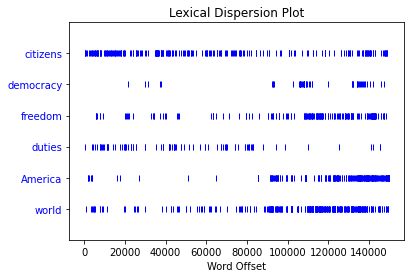

In [7]:
# Text4 is the inauguration addresses
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America", "world"])

#### Exercise

Pick your own text and create a dispersion plot for your keywords of choice. As a reminder:
* text1: Moby Dick by Herman Melville 1851
* text2: Sense and Sensibility by Jane Austen 1811
* text3: The Book of Genesis
* text4: Inaugural Address Corpus
* text5: Chat Corpus
* text6: Monty Python and the Holy Grail
* text7: Wall Street Journal
* text8: Personals Corpus
* text9: The Man Who Was Thursday by G . K . Chesterton 1908

In [8]:
# Your code here

### Normalization and Tokenization

So, in order to to proper analysis we need to remove all the punctuation from the document. However, keeping only alphanumeric characters will break things like `B.Sc.` `N.Y.U.` and so on. The process of properly splitting the document into appropriate basic elements is called `tokenization`.

NLTK gives us a (set of ) function call(s) that can do the tokenization (see also http://www.nltk.org/_modules/nltk/tokenize.html):

In [9]:
import string 

example = '''Good bagels cost $2.88 in New York.  
    Hey Prof. White, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D., you can handle this, right?'''

tokens = nltk.word_tokenize(example)
print("All tokens:", tokens)
print('-------------------')
words = [w.lower() for w in tokens if w not in string.punctuation]
print("Only words:", words)

All tokens: ['Good', 'bagels', 'cost', '$', '2.88', 'in', 'New', 'York', '.', 'Hey', 'Prof.', 'White', ',', 'please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.', 'PS', ':', 'You', 'have', 'a', 'Ph.D.', ',', 'you', 'can', 'handle', 'this', ',', 'right', '?']
-------------------
Only words: ['good', 'bagels', 'cost', '2.88', 'in', 'new', 'york', 'hey', 'prof.', 'white', 'please', 'buy', 'me', 'two', 'of', 'them', 'thanks', 'ps', 'you', 'have', 'a', 'ph.d.', 'you', 'can', 'handle', 'this', 'right']


#### Sentence splitting

The tokenization process can also work on separating sentences

In [10]:
example = '''Good bagels cost $2.88 in N.Y.C. Hey Prof. White, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D. you can handle this, right?'''

print(nltk.sent_tokenize(example))

['Good bagels cost $2.88 in N.Y.C.', 'Hey Prof. White, please buy me two of them.', 'Thanks.', 'PS: You have a Ph.D. you can handle this, right?']


### Frequency distributions, Zipf's law

### Processing Text: Introduction 

Let's start by fetching a piece of text. We will go to [Project Gutenberg](https://www.gutenberg.org/) and fetch the text for "The origin of species"

In [13]:
!mkdir data
! curl http://www.gutenberg.org/files/2009/2009-0.txt -o data/origin-of-species.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1263k  100 1263k    0     0  4879k      0 --:--:-- --:--:-- --:--:-- 4879k


In [24]:
f = open('data/origin-of-species.txt', 'r')
content = f.read()
f.close()
!head data/origin-of-species.txt

﻿The Project Gutenberg eBook of On the Origin of Species, by Charles Darwin

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.



In [25]:
# Approximate bytes of text
print(len(content))

1268332


Now, we have our first text ready to be analyzed. Let's first do some analysis of the words that appear in this classic text:

In [26]:
tokens = nltk.word_tokenize(content)

# Frequency analysis for words of interest
fdist = nltk.FreqDist(tokens)

# Number of unique and total words in the text
print(fdist)

<FreqDist with 11950 samples and 235610 outcomes>


Let's take a look at the frequencies of some words in the text:

#### But watch out, the same words appear in upper and lower case and are counted separately. We will fix this later

In [27]:
fdist

FreqDist({'\ufeffThe': 1,
          'Project': 85,
          'Gutenberg': 29,
          'eBook': 11,
          'of': 10386,
          'On': 126,
          'the': 13955,
          'Origin': 9,
          'Species': 13,
          ',': 15796,
          'by': 1817,
          'Charles': 13,
          'Darwin': 6,
          'This': 164,
          'is': 2078,
          'for': 1395,
          'use': 105,
          'anyone': 5,
          'anywhere': 7,
          'in': 5048,
          'United': 52,
          'States': 53,
          'and': 5791,
          'most': 445,
          'other': 944,
          'parts': 253,
          'world': 148,
          'at': 834,
          'no': 400,
          'cost': 3,
          'with': 1415,
          'almost': 212,
          'restrictions': 2,
          'whatsoever': 3,
          '.': 5542,
          'You': 12,
          'may': 674,
          'copy': 12,
          'it': 1236,
          'give': 122,
          'away': 42,
          'or': 1703,
          're-use': 2,

In [28]:
print(fdist["species"])
print(fdist["sexual"])
print(fdist["origin"])

1809
51
50


Now let's see what are the most frequent tokens of the text:

In [29]:
print(fdist.most_common(50))

[(',', 15796), ('the', 13955), ('of', 10386), ('and', 5791), ('.', 5542), ('in', 5048), ('to', 4767), ('a', 3258), ('that', 2701), (';', 2145), ('have', 2117), ('be', 2115), ('as', 2102), ('is', 2078), ('by', 1817), ('species', 1809), ('which', 1789), ('or', 1703), ('are', 1667), ('on', 1584), ('with', 1415), ('for', 1395), ('from', 1387), ('not', 1321), ('been', 1243), ('it', 1236), ('this', 1202), ('we', 1069), ('same', 1054), ('their', 979), ('I', 957), ('other', 944), ('at', 834), ('has', 823), ('but', 801), ('one', 773), ('will', 767), ('some', 757), ('can', 751), ('they', 746), ('more', 730), ('an', 726), ('all', 719), ('would', 700), ('may', 674), ('each', 644), ('so', 634), ('any', 614), ('The', 591), ('many', 582)]


Hm, that is not very useful. These are all words that are needed by every single English text. Only the world "species" seems to have some meaning. The rest of the words tell us nothing about the text; they're just English "plumbing."

What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words:


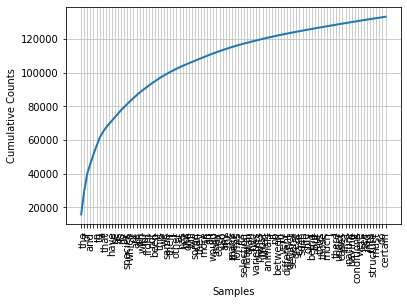

In [30]:
fdist.plot(100, cumulative=True)

These 100 words account for more than half the book! (If you remember, we had 235610 tokens in the book.)

Let's take a look at the actual words of the text:

If the frequent words don't help us, how about the words that occur only *once*, the so-called *hapaxes*? View them by typing `fdist.hapaxes()`: 

In [32]:
fdist.hapaxes()

['\ufeffThe',
 'Title',
 '6th',
 'Release',
 'Date',
 '1999',
 '#',
 'updated',
 '2021',
 'Language',
 'encoding',
 'UTF-8',
 'Produced',
 'Sue',
 'Asscher',
 'David',
 'Widger',
 'listed',
 'Click',
 'filenumbers',
 '1228',
 '22764',
 'Second',
 '1872',
 'definitive',
 'PRESERVATION',
 'FAVOURED',
 'RACES',
 'M.A.',
 'F.R.S.',
 'Descent',
 'Additions',
 'Corrections',
 'this—we',
 'insulated',
 'interpositions',
 'Divine',
 'exerted',
 '—Whewell',
 'Bridgewater',
 'STATED',
 'FIXED',
 'SETTLED',
 'presupposes',
 'intelligent',
 'supernatural',
 '—Butler',
 'Revealed',
 'Religion',
 'conceit',
 'sobriety',
 'ill-applied',
 'moderation',
 'divinity',
 'philosophy',
 'proficience',
 'both.',
 '—Bacon',
 'Advancement',
 'Learning',
 'PREVIOUSLY',
 'PUBLICATION',
 'EDITION',
 'pre',
 'Physicae',
 'Auscultationes',
 'lib.2',
 'cap.8',
 's.2',
 'spoil',
 'farmer',
 'threshed',
 'translated',
 'Clair',
 'Grece',
 'hinders',
 'dividing',
 'grinders',
 'masticating',
 'Wheresoever',
 'appropria

In [33]:
print(len(fdist.hapaxes()))

5197


So out of the 11950  unique words, 5197 of them appear only once in the text. But these are only 5197 out of the total of 235610 words in the text. This is ~2.2% of the text.

### Zipf's Law

Zipf's law says that the frequencies of words in text follow a power-law: A few words account for a big fraction of the text (the very frequent ones, usually just the "plumbing" of English), and a large fraction of the unique vocabularly (the "hapaxes") appear very infrequently.

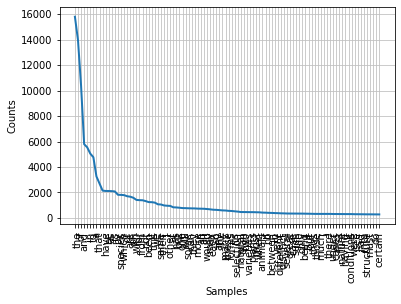

In [39]:
fdist.plot(100, cumulative=False)

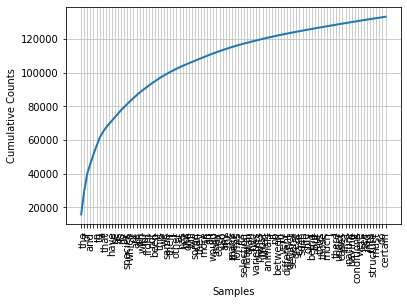

In [40]:
fdist.plot(100, cumulative=True)

### Stopwords

NLTK contains a corpus of stopwords, that is, high-frequency words like `the`, `to` and `also` that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical or semantic content, and their presence in a text fails to distinguish it from other texts.

In [41]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#####  Let's define a function to remove the words in a text are in the stopwords list:

In [42]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['one', 'may', 'would', 'many']) # add a few more stopwords

def get_most_frequent_words(text, top):
    content = [
        w.lower() for w in text
        if w.lower() not in stopwords # the word should not be a stopword 
        and w.isalpha() # and should consists of letters (no number or punctuation)
    ] 
    return nltk.FreqDist(content).most_common(top)

# get the top-10 most frequent, non-stopwords in the text
text_nostopwords = get_most_frequent_words(tokens, 10)

print(text_nostopwords)

[('species', 1844), ('forms', 550), ('selection', 540), ('natural', 529), ('varieties', 469), ('two', 460), ('plants', 457), ('animals', 424), ('thus', 391), ('several', 369)]


##### Next we do a dispersion plot. It will show us where individual words appear in the text
#    




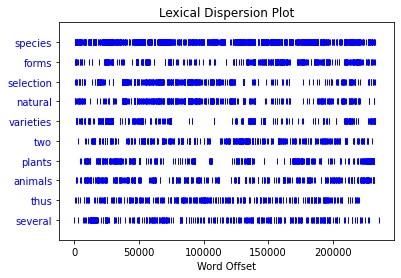

In [43]:
# Dispersion plot
text = nltk.Text(tokens)
text.dispersion_plot([token for token, frequency in text_nostopwords])

### Summary

* A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
* Tokenization is the segmentation of a text into basic units — or tokens — such as words and punctuation. Tokenization based on whitespace is inadequate for many applications because it bundles punctuation together with words. NLTK provides an off-the-shelf tokenizer nltk.word_tokenize().
* Zipf's law indicates that there are a few words that appear very often but there is also a large number of words that appear infrequently.